### Project 02: Automate API Extraction

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [21]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
}

headers = {
    'accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(data)
except(ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\paras\AppData\Local\Temp\ipykernel_7884\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980004e+07,1.980004e+07,False,NaN,1,NaN,NaN,None,2024-12-23T11:02:00.000Z,96270.162001,5.241184e+10,14.0848,0.269204,-0.677124,-7.964386,-2.282519,43.753132,51.694603,1.906153e+12,57.3398,2.021673e+12,None,2024-12-23T11:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
1,1027,Ethereum,ETH,ethereum,9718,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204573e+08,1.204573e+08,True,NaN,2,NaN,NaN,None,2024-12-23T11:03:00.000Z,3351.004551,2.952735e+10,2.7996,0.398952,-0.827346,-15.094280,-0.136967,32.765316,26.817276,4.036528e+11,12.1530,4.036528e+11,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
2,825,Tether USDt,USDT,tether,109690,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.398483e+11,1.434401e+11,True,NaN,3,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.998862,1.270501e+11,-1.8543,-0.022442,-0.036748,-0.017662,-0.215906,-0.003196,-0.114456,1.396891e+11,4.2020,1.432768e+11,None,2024-12-23T11:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-23 11:04:42.738649
3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.725238e+10,9.998681e+10,False,NaN,4,NaN,NaN,None,2024-12-23T11:03:00.000Z,2.213048,1.174824e+10,-9.6715,0.198472,-2.783020,-7.275539,44.057266,320.432002,276.069652,1.267023e+11,3.8114,2.213048e+11,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440076e+08,1.440076e+08,False,NaN,5,NaN,NaN,None,2024-12-23T11:03:00.000Z,674.383819,1.503643e+09,16.8047,0.634364,1.112216,-4.903549,1.413928,14.564525,11.889287,9.711641e+10,2.9214,9.711641e+10,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.793416e+08,5.906422e+08,True,NaN,6,NaN,NaN,None,2024-12-23T11:03:00.000Z,185.205019,4.349092e+09,-18.4671,0.148050,-0.295392,-14.799468,-27.940871,7.090719,26.502712,8.877646e+10,2.6705,1.093899e+11,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.473185e+11,1.473185e+11,True,NaN,7,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.317256,4.103187e+09,-24.4295,0.092815,-1.080721,-20.543484,-33.092173,130.737794,191.801853,4.673768e+10,1.4059,4.673768e+10,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
7,3408,USDC,USDC,usd-coin,24083,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.295668e+10,4.295668e+10,False,NaN,8,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.999921,7.483605e+09,16.2012,-0.020787,-0.005960,0.039254,0.007900,0.010854,-0.027202,4.295328e+10,1.2921,4.295328e+10,None,2024-12-23T11:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-23 11:04:42.738649
8,2010,Cardano,ADA,cardano,1418,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.5

In [23]:
import os

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }

    headers = {
        'accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except(ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    if not os.path.isfile(r'D:\VS Code\Data Analysis\da_bootcamp\Portfolio Projects\Project_02\API.csv'):
        df.to_csv(r'D:\VS Code\Data Analysis\da_bootcamp\Portfolio Projects\Project_02\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\VS Code\Data Analysis\da_bootcamp\Portfolio Projects\Project_02\API.csv', mode='a', header=False)

In [68]:
from time import time, sleep

# for i in range(333):
#     api_runner()
#     print('API runner completed')
#     sleep(60)
# exit()
api_runner()

C:\Users\paras\AppData\Local\Temp\ipykernel_7884\485012434.py:29: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\paras\AppData\Local\Temp\ipykernel_7884\485012434.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [69]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19800043.00000,19800043.00000,False,NaN,1,NaN,NaN,None,2024-12-23T11:02:00.000Z,96270.16200,52411837319.29913,14.08480,0.26920,-0.67712,-7.96439,-2.28252,43.75313,51.69460,1906153347235.29053,57.33980,2021673402019.43994,None,2024-12-23T11:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
1,1027,Ethereum,ETH,ethereum,9718,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457250.77872,120457250.77872,True,NaN,2,NaN,NaN,None,2024-12-23T11:03:00.000Z,3351.00455,29527350539.88534,2.79960,0.39895,-0.82735,-15.09428,-0.13697,32.76532,26.81728,403652795578.89240,12.15300,403652795578.89001,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
2,825,Tether USDt,USDT,tether,109690,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139848269931.16287,143440125285.11392,True,NaN,3,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.99886,127050084599.33507,-1.85430,-0.02244,-0.03675,-0.01766,-0.21591,-0.00320,-0.11446,139689056068.63068,4.20200,143276822182.39999,None,2024-12-23T11:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-23 11:04:42.738649
3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,NaN,NaN,None,2024-12-23T11:03:00.000Z,2.21305,11748244512.39279,-9.67150,0.19847,-2.78302,-7.27554,44.05727,320.43200,276.06965,126702277453.36295,3.81140,221304820033.48001,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007614.99000,144007614.99000,False,NaN,5,NaN,NaN,None,2024-12-23T11:03:00.000Z,674.38382,1503643007.66248,16.80470,0.63436,1.11222,-4.90355,1.41393,14.56453,11.88929,97116405423.21744,2.92140,97116405423.22000,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479341552.58105,590642241.18033,True,NaN,6,NaN,NaN,None,2024-12-23T11:03:00.000Z,185.20502,4349092212.41338,-18.46710,0.14805,-0.29539,-14.79947,-27.94087,7.09072,26.50271,88776461332.27867,2.67050,109389907474.14999,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147318466383.70520,147318466383.70520,True,NaN,7,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.31726,4103186723.05280,-24.42950,0.09282,-1.08072,-20.54348,-33.09217,130.73779,191.80185,46737678944.71737,1.40590,46737678944.72000,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
7,3408,USDC,USDC,usd-coin,24083,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42956683729.08823,42956683729.08823,False,NaN,8,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.99992,7483605309.72916,16.20120,-0.02079,-0.00596,0.03925,0.00790,0.01085,-0.02720,42953279897.32359,1.29210,42953279897.32000,None,2024-12-23T11:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6

In [26]:
df72 = pd.read_csv(r'D:\VS Code\Data Analysis\da_bootcamp\Portfolio Projects\Project_02\API.csv')
df72

,0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem', 'ftx-bankruptcy-estate', '2017-2018-alt-season']",21000000.0,19800043.0,19800043.0.1,False,Unnamed: 12,1.1,Unnamed: 14,Unnamed: 15,Unnamed: 16,2024-12-23T11:02:00.000Z,96270.16200092548,52411837319.29913,14.0848,0.26920397,-0.67712391,-7.96438609,-2.28251934,43.75313248,51.69460273,1906153347235.2905,57.3398,2021673402019.44,Unnamed: 30,2024-12-23T11:02:00.000Z.1,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,2024-12-23 11:04:42.738649
0,1,1027,Ethereum,ETH,ethereum,9718,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204573e+08,1.204573e+08,True,NaN,2,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,3351.004551,2.952735e+10,2.7996,0.398952,-0.827346,-15.094280,-0.136967,32.765316,26.817276,4.036528e+11,12.1530,4.036528e+11,NaN,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
1,2,825,Tether USDt,USDT,tether,109690,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.398483e+11,1.434401e+11,True,NaN,3,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,0.998862,1.270501e+11,-1.8543,-0.022442,-0.036748,-0.017662,-0.215906,-0.003196,-0.114456,1.396891e+11,4.2020,1.432768e+11,NaN,2024-12-23T11:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-23 11:04:42.738649
2,3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.725238e+10,9.998681e+10,False,NaN,4,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,2.213048,1.174824e+10,-9.6715,0.198472,-2.783020,-7.275539,44.057266,320.432002,276.069652,1.267023e+11,3.8114,2.213048e+11,NaN,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
3,4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440076e+08,1.440076e+08,False,NaN,5,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,674.383819,1.503643e+09,16.8047,0.634364,1.112216,-4.903549,1.413928,14.564525,11.889287,9.711641e+10,2.9214,9.711641e+10,NaN,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
4,5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.793416e+08,5.906422e+08,True,NaN,6,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,185.205019,4.349092e+09,-18.4671,0.148050,-0.295392,-14.799468,-27.940871,7.090719,26.502712,8.877646e+10,2.6705,1.093899e+11,NaN,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
5,6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.473185e+11,1.473185e+11,True,NaN,7,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,0.317256,4.103187e+09,-24.4295,0.092815,-1.080721,-20.543484,-33.092173,130.737794,191.801853,4.673768e+10,1.4059,4.673768e+10,NaN,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
6,7,3408,USDC,USDC,usd-coin,24083,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.295668e+10,4.295668e+10,False,NaN,8,NaN,NaN,NaN,2024-12-23T11:03:00.000Z,0.999921,7.483605e+09,16.2012,-0.020787,-0.005960,0.039254,0.007900,0.010854,-0.027202,4.295328e+10,1.2921,4.295328e+10,NaN,2024-12-23T11:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6

In [70]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [71]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19800043.00000,19800043.00000,False,NaN,1,NaN,NaN,None,2024-12-23T11:02:00.000Z,96270.16200,52411837319.29913,14.08480,0.26920,-0.67712,-7.96439,-2.28252,43.75313,51.69460,1906153347235.29053,57.33980,2021673402019.43994,None,2024-12-23T11:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
1,1027,Ethereum,ETH,ethereum,9718,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457250.77872,120457250.77872,True,NaN,2,NaN,NaN,None,2024-12-23T11:03:00.000Z,3351.00455,29527350539.88534,2.79960,0.39895,-0.82735,-15.09428,-0.13697,32.76532,26.81728,403652795578.89240,12.15300,403652795578.89001,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
2,825,Tether USDt,USDT,tether,109690,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139848269931.16287,143440125285.11392,True,NaN,3,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.99886,127050084599.33507,-1.85430,-0.02244,-0.03675,-0.01766,-0.21591,-0.00320,-0.11446,139689056068.63068,4.20200,143276822182.39999,None,2024-12-23T11:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-23 11:04:42.738649
3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,NaN,NaN,None,2024-12-23T11:03:00.000Z,2.21305,11748244512.39279,-9.67150,0.19847,-2.78302,-7.27554,44.05727,320.43200,276.06965,126702277453.36295,3.81140,221304820033.48001,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007614.99000,144007614.99000,False,NaN,5,NaN,NaN,None,2024-12-23T11:03:00.000Z,674.38382,1503643007.66248,16.80470,0.63436,1.11222,-4.90355,1.41393,14.56453,11.88929,97116405423.21744,2.92140,97116405423.22000,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
5,5426,Solana,SOL,solana,813,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479341552.58105,590642241.18033,True,NaN,6,NaN,NaN,None,2024-12-23T11:03:00.000Z,185.20502,4349092212.41338,-18.46710,0.14805,-0.29539,-14.79947,-27.94087,7.09072,26.50271,88776461332.27867,2.67050,109389907474.14999,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
6,74,Dogecoin,DOGE,dogecoin,1130,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147318466383.70520,147318466383.70520,True,NaN,7,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.31726,4103186723.05280,-24.42950,0.09282,-1.08072,-20.54348,-33.09217,130.73779,191.80185,46737678944.71737,1.40590,46737678944.72000,None,2024-12-23T11:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 11:04:42.738649
7,3408,USDC,USDC,usd-coin,24083,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42956683729.08823,42956683729.08823,False,NaN,8,NaN,NaN,None,2024-12-23T11:03:00.000Z,0.99992,7483605309.72916,16.20120,-0.02079,-0.00596,0.03925,0.00790,0.01085,-0.02720,42953279897.32359,1.29210,42953279897.32000,None,2024-12-23T11:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6

In [72]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.14302,-0.81559,-8.03957,-2.37130,43.63103,51.56251
Ethereum,0.18704,-0.93912,-15.18865,-0.35461,32.58593,26.67173
Tether USDt,-0.01879,-0.04053,-0.02990,-0.21937,-0.00516,-0.11224
XRP,-0.00835,-2.81286,-7.29356,43.88178,319.98463,275.88382
BNB,0.54097,1.03278,-4.96992,1.32791,14.46071,11.81681
Solana,-0.07309,-0.47921,-14.88595,-28.06285,6.96453,26.37227
Dogecoin,-0.09423,-1.21625,-20.55371,-33.05406,130.47458,191.69069
USDC,-0.01116,-0.00253,0.03739,0.00921,0.00876,-0.01755
Cardano,-0.26242,-1.69641,-16.16705,-16.54406,162.88349,143.32935


In [73]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.14302
             quote.USD.percent_change_24h    -0.81559
             quote.USD.percent_change_7d     -8.03957
             quote.USD.percent_change_30d    -2.37130
             quote.USD.percent_change_60d    43.63103
             quote.USD.percent_change_90d    51.56251
Ethereum     quote.USD.percent_change_1h      0.18704
             quote.USD.percent_change_24h    -0.93912
             quote.USD.percent_change_7d    -15.18865
             quote.USD.percent_change_30d    -0.35461
             quote.USD.percent_change_60d    32.58593
             quote.USD.percent_change_90d    26.67173
Tether USDt  quote.USD.percent_change_1h     -0.01879
             quote.USD.percent_change_24h    -0.04053
             quote.USD.percent_change_7d     -0.02990
             quote.USD.percent_change_30d    -0.21937
             quote.USD.percent_change_60d    -0.00516
             quote.USD.percent_change_90

In [74]:
type(df4)

pandas.core.series.Series

In [75]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.14302
            quote.USD.percent_change_24h  -0.81559
            quote.USD.percent_change_7d   -8.03957
            quote.USD.percent_change_30d  -2.37130
            quote.USD.percent_change_60d  43.63103
            quote.USD.percent_change_90d  51.56251
Ethereum    quote.USD.percent_change_1h    0.18704
            quote.USD.percent_change_24h  -0.93912
            quote.USD.percent_change_7d  -15.18865
            quote.USD.percent_change_30d  -0.35461
            quote.USD.percent_change_60d  32.58593
            quote.USD.percent_change_90d  26.67173
Tether USDt quote.USD.percent_change_1h   -0.01879
            quote.USD.percent_change_24h  -0.04053
            quote.USD.percent_change_7d   -0.02990
            quote.USD.percent_change_30d  -0.21937
            quote.USD.percent_change_60d  -0.00516
            quote.USD.percent_change_90d  -0.11224
XRP         quote.USD.percent_change_1h   -0.00835
            quote.USD.percent_change_24h  -2.81286
            quote.USD.percent_change_7d   -7.29356
            quote.USD.percent_change_30d  43.88178
            quote.USD.percent_change_60d 319.98463
            quote.USD.percent_change_90d 275.88382
BNB         quote.USD.percent_change_1h    0.54097
            quote.USD.percent_change_24h   1.03278
            quote.USD.percent_change_7d   -4.96992
            quote.USD.percent_change_30d   1.32791
            quote.USD.percent_change_60d  14.46071
            quote.USD.percent_change_90d  11.81681
Solana      quote.USD.percent_change_1h   -0.07309
            quote.USD.percent_change_24h  -0.47921
            quote.USD.percent_change_7d  -14.88595
            quote.USD.percent_change_30d -28.06285
            quote.USD.percent_change_60d   6.96453
            quote.USD.percent_change_90d  26.37227
Dogecoin    quote.USD.percent_change_1h   -0.09423
            quote.USD.percent_change_24h  -1.21625
            quote.USD.percent_change_7d  -20.55371
            quote.USD.percent_change_30d -33.05406
            quote.USD.percent_change_60d 130.47458
            quote.USD.percent_change_90d 191.69069
USDC        quote.USD.percent_change_1h   -0.01116
            quote.USD.percent_change_24h  -0.00253
            quote.USD.percent_change_7d    0.03739
            quote.USD.percent_change_30d   0.00921
            quote.USD.percent_change_60d   0.00876
            quote.USD.percent_change_90d  -0.01755
Cardano     quote.USD.percent_change_1h   -0.26242
            quote.USD.percent_change_24h  -1.69641
            quote.USD.percent_change_7d  -16.16705
            quote.USD.percent_change_30d -16.54406
            quote.USD.percent_change_60d 162.88349
            quote.USD.percent_change_90d 143.32935
TRON        quote.USD.percent_change_1h    0.17892
            quote.USD.percent_change_24h   0.36676
            quote.USD.percent_change_7d  -11.06442
            quote.USD.percent_change_30d  15.44521
            quote.USD.percent_change_60d  52.88408
            quote.USD.percent_change_90d  63.83208
Avalanche   quote.USD.percent_change_1h   -0.16305
            quote.USD.percent_change_24h  -2.38431
            quote.USD.percent_change_7d  -24.22551
            quote.USD.percent_change_30d -12.25382
            quote.USD.percent_change_60d  40.11005
            quote.USD.percent_change_90d  34.89450
Chainlink   quote.USD.percent_change_1h   -0.10219
            quote.USD.percent_change_24h   2.33878
            quote.USD.percent_change_7d  -23.75753
            quote.USD.percent_change_30d  38.10085
            quote.USD.percent_change_60d 104.63086
            quote.USD.percent_change_90d 101.70878
Toncoin     quote.USD.percent_change_1h   -0.18058
            quote.USD.percent_change_24h   0.78324
            quote.USD.percent_change_7d  -10.85950
            quote.USD.percent_change_30d  -4.60296
            quote.USD.percent_change_60d   5.88064
            quo

In [76]:
df5.count()

values    90
dtype: int64

In [56]:
index = pd.Index(range(90))

In [77]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.14302
1,Bitcoin,quote.USD.percent_change_24h,-0.81559
2,Bitcoin,quote.USD.percent_change_7d,-8.03957
3,Bitcoin,quote.USD.percent_change_30d,-2.37130
4,Bitcoin,quote.USD.percent_change_60d,43.63103
5,Bitcoin,quote.USD.percent_change_90d,51.56251
6,Ethereum,quote.USD.percent_change_1h,0.18704
7,Ethereum,quote.USD.percent_change_24h,-0.93912
8,Ethereum,quote.USD.percent_change_7d,-15.18865
9,Ethereum,quote.USD.percent_change_30d,-0.35461


In [58]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26920
1,Bitcoin,quote.USD.percent_change_24h,-0.67712
2,Bitcoin,quote.USD.percent_change_7d,-7.96439
3,Bitcoin,quote.USD.percent_change_30d,-2.28252
4,Bitcoin,quote.USD.percent_change_60d,43.75313
5,Bitcoin,quote.USD.percent_change_90d,51.69460
6,Ethereum,quote.USD.percent_change_1h,0.39895
7,Ethereum,quote.USD.percent_change_24h,-0.82735
8,Ethereum,quote.USD.percent_change_7d,-15.09428
9,Ethereum,quote.USD.percent_change_30d,-0.13697


In [78]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.26920
1,Bitcoin,24h,-0.67712
2,Bitcoin,7d,-7.96439
3,Bitcoin,30d,-2.28252
4,Bitcoin,60d,43.75313
5,Bitcoin,90d,51.69460
6,Ethereum,1h,0.39895
7,Ethereum,24h,-0.82735
8,Ethereum,7d,-15.09428
9,Ethereum,30d,-0.13697


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

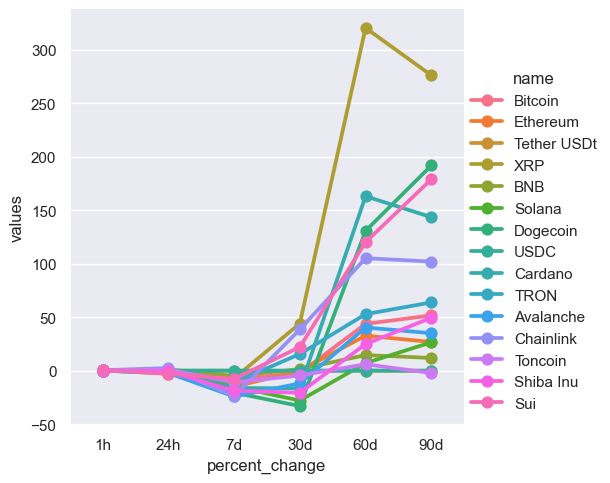

In [80]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [81]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,96270.16200,2024-12-23 11:04:42.738649
0,Bitcoin,96270.16200,2024-12-23 11:04:57.856709
0,Bitcoin,96013.40528,2024-12-23 11:21:01.538609


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

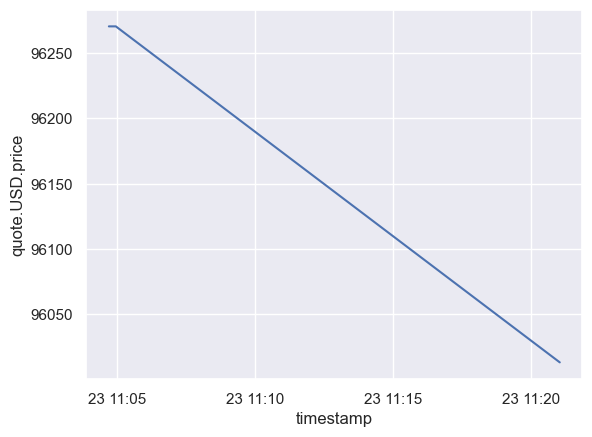

In [82]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)